In [5]:
# Paketler
import pandas as pd
import geopandas as gpd
import folium
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [2]:
# Veri setleri
sosyal_yardim = pd.read_csv('/Users/terens/Desktop/seffaf-ankara/data/stats/sosyal_yardim.csv')
sosyal = pd.read_csv('/Users/terens/Desktop/seffaf-ankara/data/stats/sosyal.csv')
halk_ekmek = pd.read_csv('/Users/terens/Desktop/seffaf-ankara/data/stats/halk_ekmek.csv')
kent_konsey = pd.read_csv('/Users/terens/Desktop/seffaf-ankara/data/stats/kent_konsey.csv')
ulasim = pd.read_csv('/Users/terens/Desktop/seffaf-ankara/data/stats/ulasim.csv')
demografik = pd.read_csv('/Users/terens/Desktop/seffaf-ankara/data/stats/demografi.csv')

In [3]:
# Geojson
sosyal_yardim_geo = gpd.read_file('/Users/terens/Desktop/seffaf-ankara/data/geojson/sosyal_yardim.json')
sosyal_geo = gpd.read_file('/Users/terens/Desktop/seffaf-ankara/data/geojson/sosyal.json')
halk_ekmek_geo = gpd.read_file('/Users/terens/Desktop/seffaf-ankara/data/geojson/halk_ekmek.json')
kent_konsey_geo = gpd.read_file('/Users/terens/Desktop/seffaf-ankara/data/geojson/kent_konsey.json')
ulasim_geo = gpd.read_file('/Users/terens/Desktop/seffaf-ankara/data/geojson/ulasim.json')
demografik_geo = gpd.read_file('/Users/terens/Desktop/seffaf-ankara/data/geojson/demografi.json')

In [6]:
sosyal_yardim.columns

Index(['Unnamed: 0', 'adi', 'gida_olumlu', 'komur_olumlu', 'ekmek_olumlu',
       'giysi_olumlu', 'baskent_kart_olumlu', 'sut_olumlu',
       'toplam_sosyal_yardim', 'ilce', 'toplam_nufus', 'katsayi',
       'gida_olumlu_10k', 'komur_olumlu_10k', 'ekmek_olumlu_10k',
       'giysi_olumlu_10k', 'baskent_kart_olumlu_10k', 'sut_olumlu_10k',
       'toplam_sosyal_yardim_10k'],
      dtype='object')

In [7]:
# Değişkenlerin aynı ölçeğe getirilmesi
X = sosyal_yardim[['gida_olumlu_10k', 'komur_olumlu_10k', 'ekmek_olumlu_10k', 'giysi_olumlu_10k', 'baskent_kart_olumlu_10k', 'sut_olumlu_10k']]

# Ölçeklendirme objesi
scaler = StandardScaler()

# Ölçeklendirme
X_scaled = scaler.fit_transform(X)

In [9]:
# 4 temel bileşenli model
pca = PCA(n_components = 6, random_state = 42)

# Modelin gözetimsiz olarak eğitilmesi
pca.fit(X_scaled)

PCA(n_components=6, random_state=42)

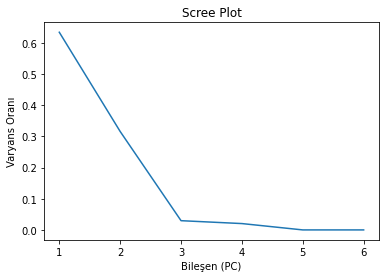

In [11]:
# Bileşenler tarafından açıklanan varyans
plt.plot(range(1, 7), pca.explained_variance_ratio_)
plt.xlabel('Bileşen (PC)')
plt.ylabel('Varyans Oranı')
plt.title('Scree Plot')
plt.show()

In [13]:
pca.explained_variance_ratio_[:2].sum()

0.9499985997178387

In [14]:
# 2 bileşenli PCA modeli
pca = PCA(n_components = 2, random_state = 42)

# Modelin eğitilmesi
pca.fit(X_scaled)

PCA(n_components=2, random_state=42)

In [15]:
loadings = pd.DataFrame(pca.components_, columns = X.columns).transpose().rename(columns = {0:'PC1_loadings', 1:'PC2_loadings'})
loadings

,PC1_loadings,PC2_loadings
gida_olumlu_10k,0.509666,0.008738
komur_olumlu_10k,0.437653,-0.303537
ekmek_olumlu_10k,0.020957,0.697922
giysi_olumlu_10k,0.168176,0.648575
baskent_kart_olumlu_10k,0.509832,0.005600
sut_olumlu_10k,0.509951,0.003597


In [19]:
# PCA grafiği

# Değişkenler
features = list(X.columns)

# Bileşenler
components = pd.DataFrame(pca.transform(X_scaled), columns = ['PC1', 'PC2'])

# Yükler
loadings = pca.components_.T

fig = px.scatter(components.assign(İlce = sosyal_yardim['adi'].values), x = 'PC1', y = 'PC2', text = 'İlce')

for i, feature in enumerate(features):
    fig.add_shape(
        type = 'line',
        x0 = 0, y0 = 0,
        x1 = loadings[i, 0],
        y1 = loadings[i, 1]
    )
    fig.add_annotation(
        x = loadings[i, 0],
        y = loadings[i, 1],
        ax = 0, ay = 0,
        xanchor = "center",
        yanchor = "bottom",
        text = feature,
    )
fig.show()